# Data Kelompok 21



1.   1301204439 - Muhammad Fadhil Fadhlurrahman
2.   1301204451 - Bagus Hariyadi
3.   1301204455 - Kian Nailaizza





# Pendahuluan

Customer churn, juga dikenal sebagai atrisi pelanggan, adalah persentase pelanggan yang berhenti menggunakan produk dan layanan bisnis Anda selama jangka waktu tertentu. Pada link colab ini akan membahas tentang bankchurners.csv. Mulai dari data Kategori pemasukan, jumlah transaksi, umur pelanggan, dan credit limit. Data tersebut akan disajikan akan disajikan dalam bentuk pie chart, histogram, boxplot, dan scatterplot

# Install library dan upload data

In [ ]:
install.packages("dplyr")
install.packages("plyr")
library(plyr)
library(dplyr)
library(ggplot2)
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data<-read.csv("https://raw.githubusercontent.com/BgsHryd/Statis/main/BankChurners.csv")
head(data,5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,⋯,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,⋯,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,⋯,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,⋯,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,⋯,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,⋯,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998


In [ ]:
summary(data)

   CLIENTNUM         Attrition_Flag      Customer_Age      Gender         
 Min.   :708082083   Length:10127       Min.   :26.00   Length:10127      
 1st Qu.:713036770   Class :character   1st Qu.:41.00   Class :character  
 Median :717926358   Mode  :character   Median :46.00   Mode  :character  
 Mean   :739177606                      Mean   :46.33                     
 3rd Qu.:773143533                      3rd Qu.:52.00                     
 Max.   :828343083                      Max.   :73.00                     
 Dependent_count Education_Level    Marital_Status     Income_Category   
 Min.   :0.000   Length:10127       Length:10127       Length:10127      
 1st Qu.:1.000   Class :character   Class :character   Class :character  
 Median :2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2.346                                                           
 3rd Qu.:3.000                                                           
 Max.   :5.000                 

# Komposisi Pelanggan

In [ ]:
flag<-ddply(data,.(data$Attrition_Flag),nrow)
names(flag)<-c("Attrition_Flag","freq")
flag$percentage<-round(flag$freq*100/sum(flag$freq),2)
flag<-flag %>% 
      arrange(desc(Attrition_Flag))%>%
      mutate(lab.ypos = cumsum(percentage)-0.5*percentage) %>%
      mutate(prop = percent(freq / sum(freq))) -> flag
   
gender_data<-ddply(data,.(data$Gender),nrow)
names(gender_data)<-c("gender","freq")
gender_data$percentage<-round(gender_data$freq*100/sum(gender_data$freq),2)
gender_data<-gender_data%>%
             arrange(desc(gender))%>%
             mutate(lab.ypos = cumsum(percentage)-0.5*percentage)%>%
             mutate(prop = percent(freq/sum(freq)))

pie_flag<-ggplot(data = flag,aes(x="",y=percentage,fill=Attrition_Flag))+
          geom_bar(stat="identity",width=1,color="white")+
          coord_polar("y",start=0)+
          geom_text(aes(y=lab.ypos,label=paste(percentage,"%")),color="black")+
          labs(title = "Komposisi Pelanggan\nBerdasarkan Flag")+
          theme_void()+ theme(plot.title = element_text(hjust = 0.5))

pie_gender<-ggplot(data = gender_data, aes(x = "",y = percentage, fill = gender))+
            geom_bar(stat = "identity", width = 1, color = "white")+
            coord_polar("y", start = 0)+
            geom_text(aes(y = lab.ypos, label = prop),color = "black")+
            labs(title = "Komposisi Pelanggan\nBerdasarkan Jenis Kelamin")+
            theme_void()+theme(plot.title = element_text(hjust = 0.5))+
            guides(fill = guide_legend(title = "Jenis Kelamin"))+
            scale_fill_manual(values = c("pink","#787fed"))

hist_age<-ggplot(data=data,aes(x=Customer_Age,fill=..count..))+
          geom_histogram(bins = 10)+
          scale_fill_gradient(low = "cyan", high = "blue")+
          labs(title = "Distribusi dari\nUmur Pelanggan",y = "", x = "umur pelanggan")+theme_bw()+
          theme(plot.title = element_text(hjust = 0.5))

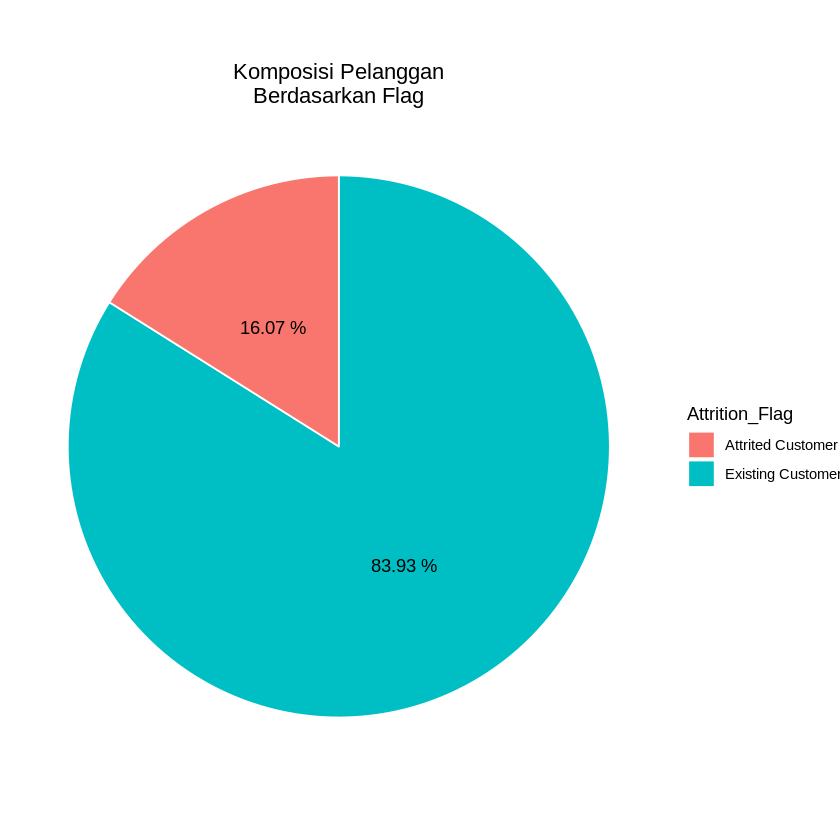

In [ ]:
pie_flag

Dari grafik di atas dapat dilihat ternyata sekitar 16% dari keseluruhan pengguna layanan bank memutuskan untuk berhenti menggunakan layanan bank

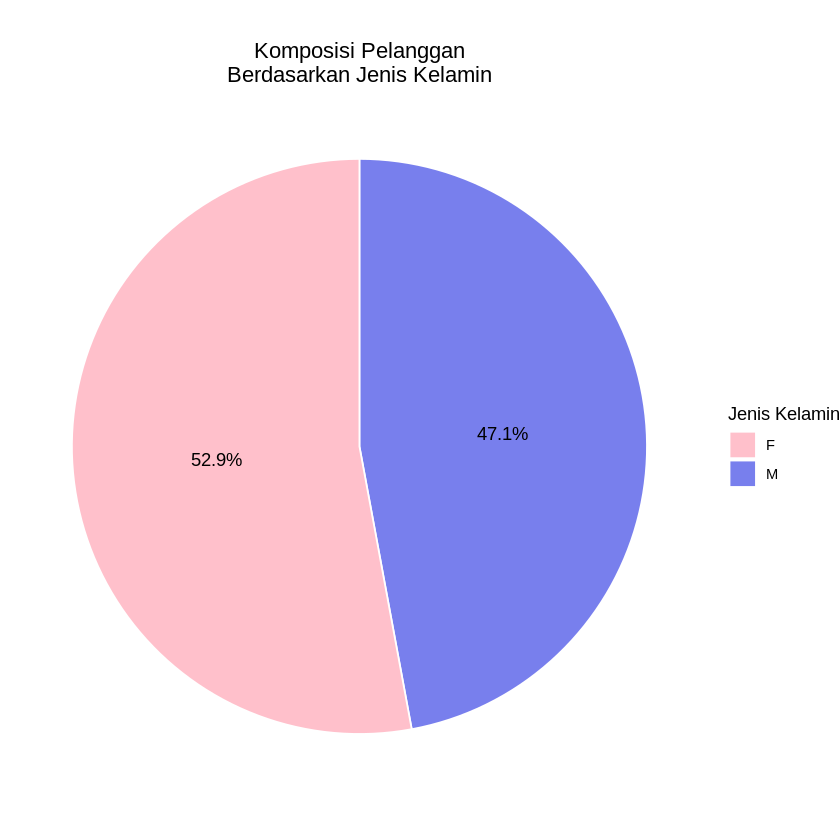

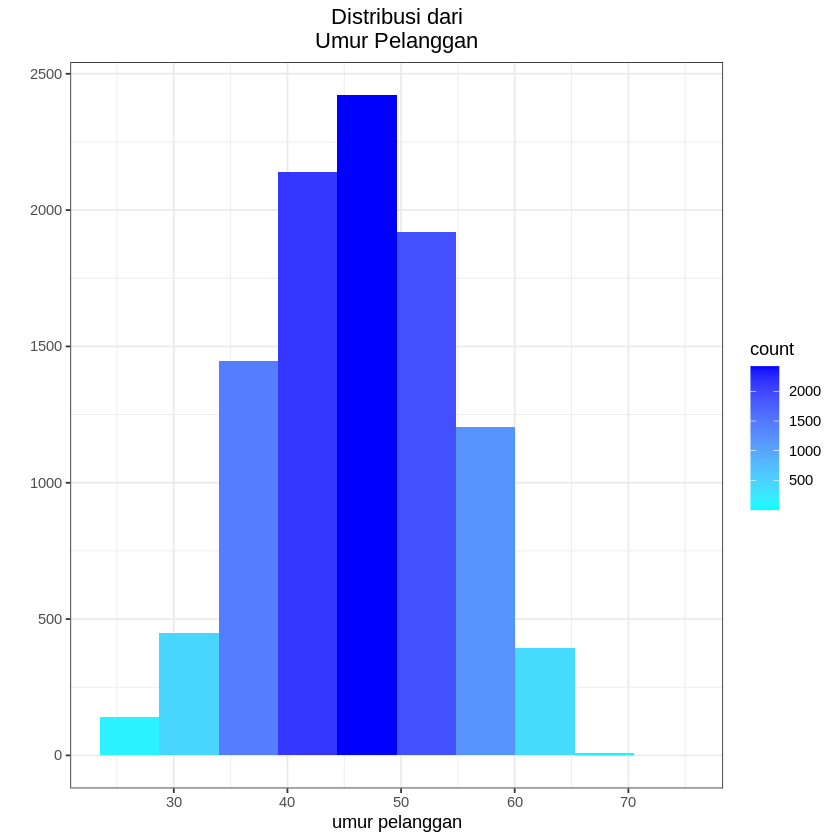

In [ ]:
pie_gender
hist_age

1.   dari grafik di atas dapat dilihat bahwa pelanggan wanita sedikit lebih banyak daripada pelanggan lelaki. Oleh karena itu, dapat dikatakan bahwa data jenis kelamin tersebar dengan merata
2.   dari histogram di atas dapat disimpulkan bahwa mayoritas pengguna bank berada di kisaran umur 40 sampai 55 tahun

# Data kategori pemasukan

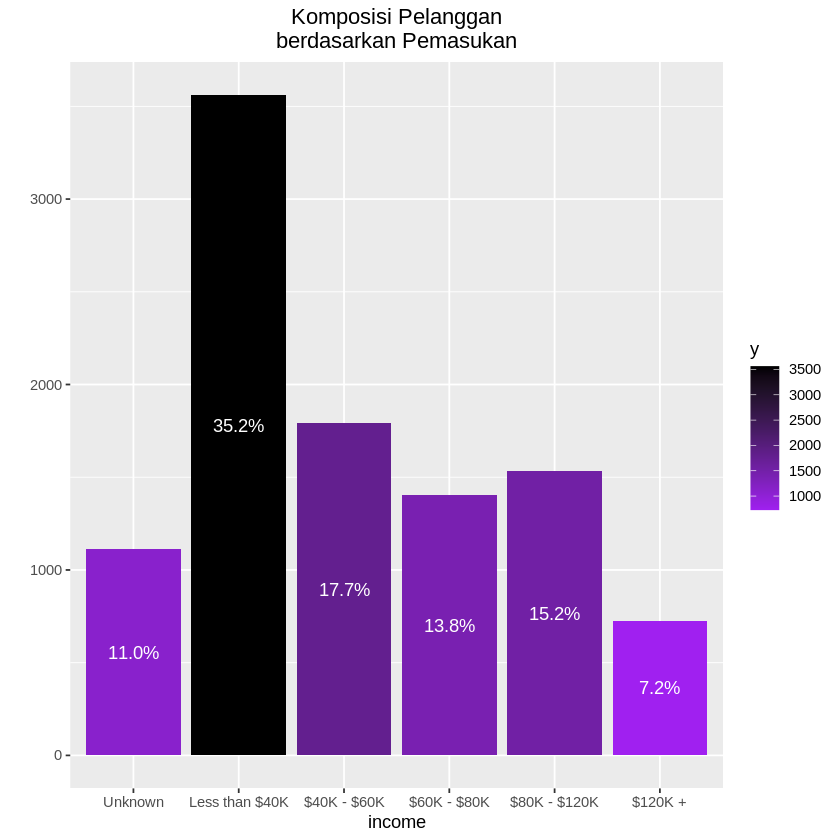

In [ ]:
pie_income<-ddply(data,.(data$Income_Category),nrow)
# pie_income<-pie_income[-c(6),]
names(pie_income)<-c("income","freq")
pie_income$percentage<-round(pie_income$freq*100/sum(pie_income$freq),2)
pie_income<-pie_income %>%
             arrange(desc(income)) %>%
             mutate(lab.ypos = cumsum(percentage)-0.5*percentage)%>%
             mutate(prop = percent(freq/sum(freq)))

#plot untuk bar income
bar_income<-pie_income
bar_income$income<-factor(bar_income$income,levels=c("Unknown","Less than $40K","$40K - $60K","$60K - $80K","$80K - $120K","$120K +"))
bar_plot<-ggplot(data = bar_income,aes(x = income, y = freq, label = prop, fill = ..y..))+
            geom_bar(position = "identity", stat = "identity")+
            geom_text(position = position_stack(vjust = 0.5),color = "white")+
            scale_fill_gradient(low = "purple", high = "black")+
            theme(plot.title = element_text(hjust = 0.5))+labs(title = "Komposisi Pelanggan\nberdasarkan Pemasukan", y = "") 
bar_plot

1.   Pelanggan bank didominasi oleh pelanggan dengan pemasukan kurang dari 40 ribu dolar
2.   Pelanggan bank paling sedikit dengan pemasukan lebih dari 120 ribu dolar
3.   Pelanggan yang tidak diketahui jumlah pemasukannya sekitar 11% dari keseluruhan pelanggan bank




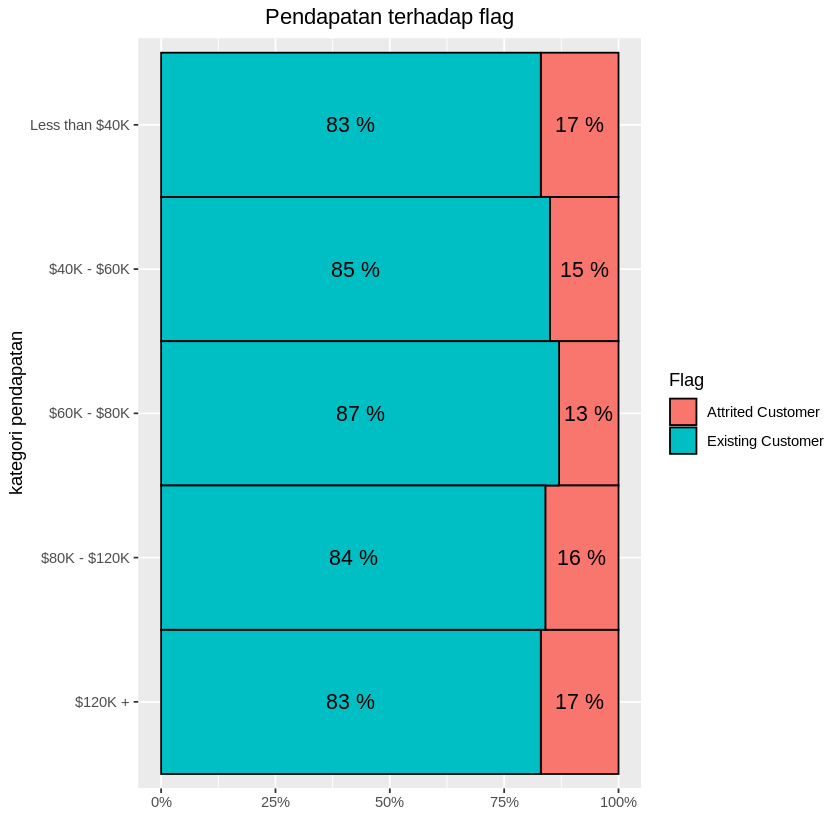

In [ ]:
plt_income<-ddply(data, .(data$Attrition_Flag,data$Income_Category),nrow)
names(plt_income)<-c("flag","income","freq")
plt_income<-plt_income[-c(6,12),]
plt_income$percentage<-c(0.17,0.15,0.13,0.16,0.17,0.83,0.85,0.87,0.84,0.83)
plt_income$income<-factor(plt_income$income,levels=c("$120K +","$80K - $120K","$60K - $80K",
                                                      "$40K - $60K","Less than $40K"))

plot.income<-ggplot(data = plt_income,aes(y=income,x=percentage,fill=flag))+
             geom_bar(position = "fill", stat = "identity", color = 'black', width = 1)+
             scale_x_continuous(label = scales::percent)+
             geom_text(aes(label = paste(percentage*100,'%')),
             position = position_stack(vjust = 0.5),size=4.5)+
             theme(plot.title = element_text(hjust = 0.5))+
             labs(title = "Pendapatan terhadap flag",x="",y="kategori pendapatan")+
             guides(fill = guide_legend(title = "Flag"))

plot.income

dari grafik di atas dapat disimpulkan bahwa



1.   dari setiap kategori pemasukan yang ada para pelanggan lebih banyak memilih untuk tidak berganti layanan bank
2.   kategori pemasukan pelanggan tidak memengaruhi keputusan pelanggan untuk berpindah layanan bank

# Data Tingkat Edukasi

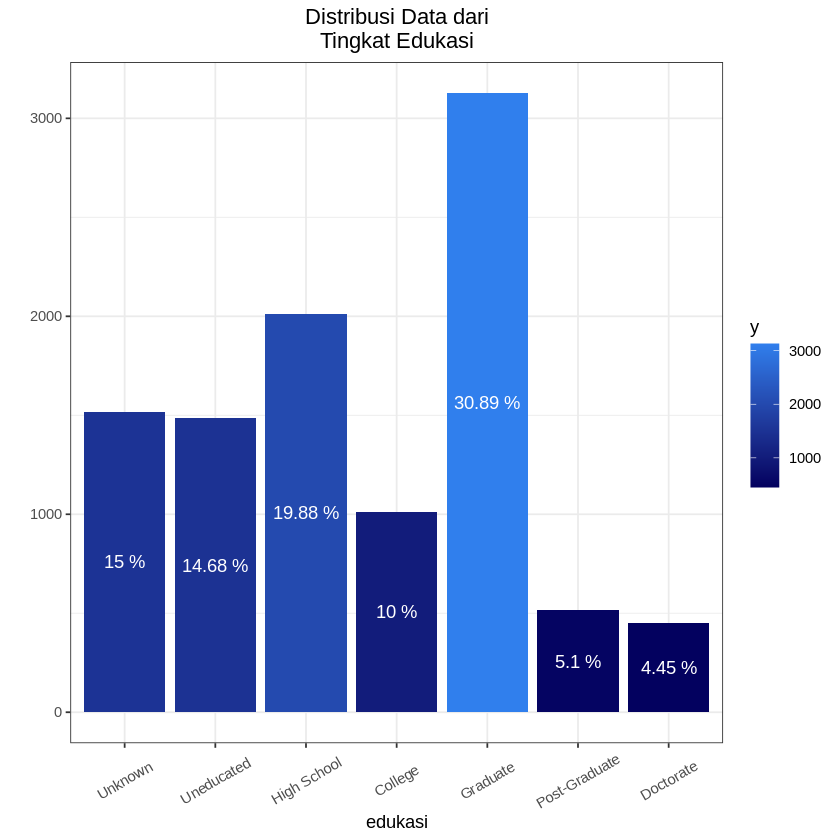

In [ ]:
edu_dist<-ddply(data, .(data$Education_Level),nrow)
names(edu_dist)<-c("edukasi","freq")
edu_dist$percentage<-round(edu_dist$freq*100/sum(edu_dist$freq),2)
edu_dist$edukasi<-factor(edu_dist$edukasi,levels = c("Unknown","Uneducated","High School","College",
                                                     "Graduate","Post-Graduate","Doctorate"))

edu_distplot<-ggplot(data = edu_dist, aes(x = edukasi, y =freq, fill = ..y..))+
              geom_bar(stat = "identity", position = "identity")+
              geom_text(aes(label = paste(percentage,"%")),position = position_stack(vjust  = 0.5),color = "white")+
              scale_fill_gradient(low = "#03015f", high = "#307fed")+
              labs(title = "Distribusi Data dari\nTingkat Edukasi", y = "")+theme_bw()+
              theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 30, vjust = 0.5))
edu_distplot

1.   dari grafik dapat dilihat bahwa mayoritas pelanggan bank adalah pelanggan yang mengenyam pendidikan formal
2.   Pelanggan didominasi oleh pelanggan yang memiliki tingkat pendidikan lulusan perguruan tinggi



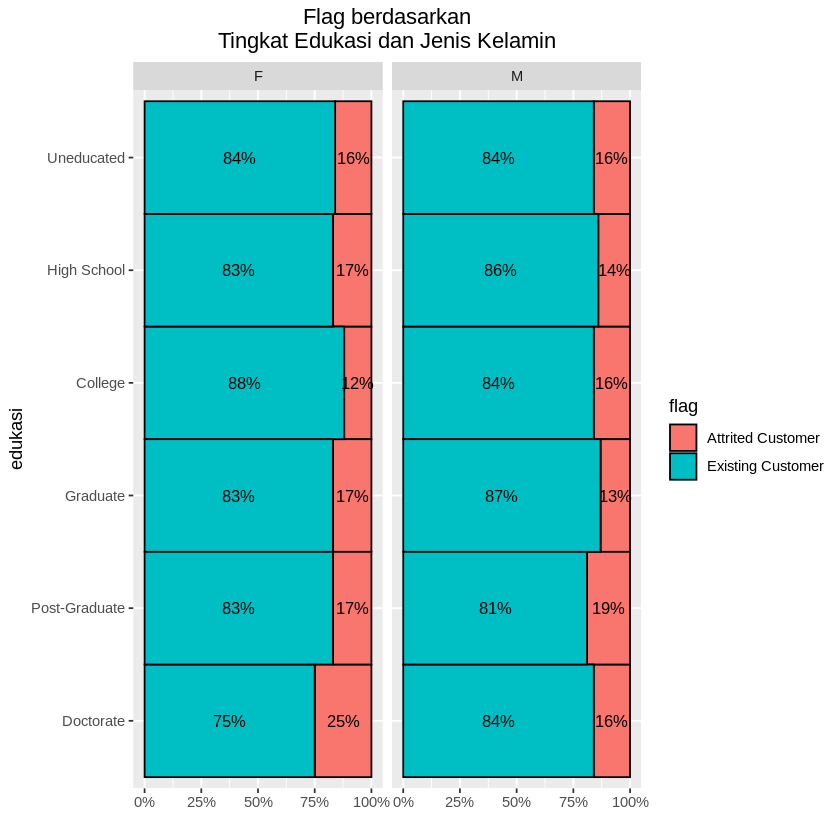

In [ ]:
edu_2<-ddply(data, .(data$Attrition_Flag,data$Education_Level,data$Gender),nrow)
names(edu_2)<-c("flag","edukasi","gender","freq")
edu_2<-edu_2[-c(13,14,27,28),]
edu_2$percentage<-c(0.12,0.16,0.25,0.16,0.17,0.13,0.17,0.14,0.17,0.19,0.16,0.16,
                    0.88,0.84,0.75,0.84,0.83,0.87,0.83,0.86,0.83,0.81,0.84,0.84)
edu_2$edukasi<-factor(edu_2$edukasi,levels=c("Doctorate","Post-Graduate","Graduate","College","High School","Uneducated"))

facet_edu<-ggplot(data = edu_2,aes(x = percentage, y = edukasi, fill = flag))+
           geom_bar(position = "fill",stat = "identity",color = "black", width = 1)+
           scale_x_continuous(labels = scales::percent)+
           geom_text(aes(label = paste0(percentage*100,"%")),position = position_stack(vjust = 0.5),size = 3.5)+
           facet_wrap(~gender)+labs(title = "Flag berdasarkan\nTingkat Edukasi dan Jenis Kelamin",x = "")+
           theme(plot.title = element_text(hjust = 0.5))
facet_edu

1.   Pelanggan yang memutuskan berhenti berlayanan terbanyak berasal dari wanita yang berpendidikan doktor
2.   Dari grafik dapat dilihat bahwa tingkat pendidikan dan jenis kelamin tidak memiliki hubungan yang kuat dengan Churn



# Data Total Transaksi

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



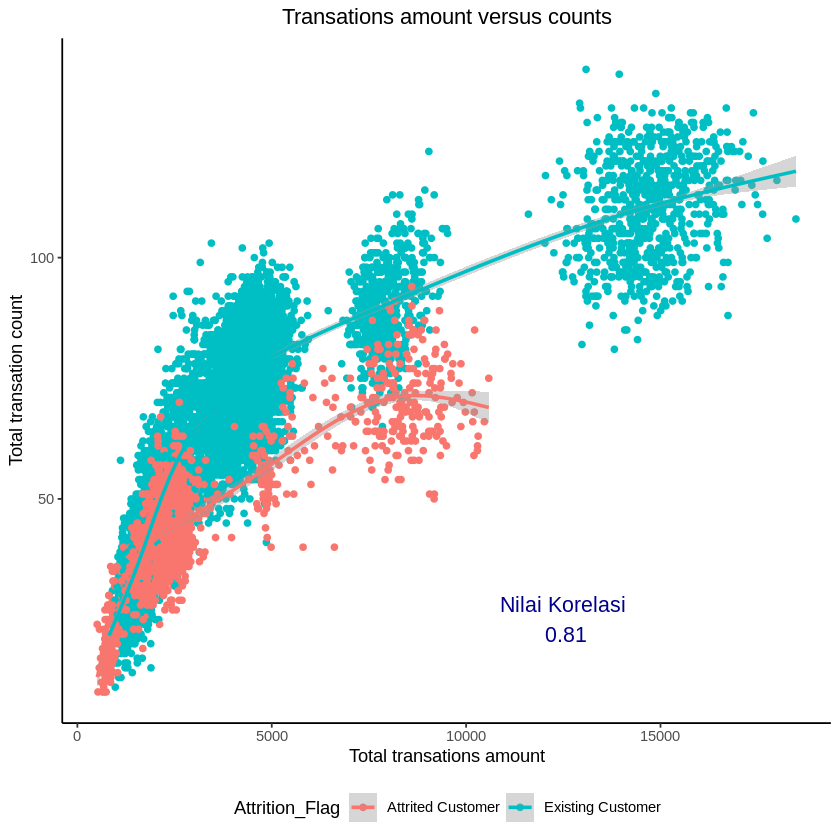

In [ ]:
Amt_Ct <-ggplot(data = data,aes(x=Total_Trans_Amt,Total_Trans_Ct,color=Attrition_Flag)) +
  geom_point() +
  geom_smooth() +
  labs(x='Total transations amount',y='Total transation count',
       title='Transations amount versus counts') +
  theme_classic() +
  theme(plot.title=element_text(hjust=0.5),legend.position = 'bottom')+
  annotate(geom = "text", x = 12500, y = 25, color = "darkblue", size = 4.5,
           label = paste("Nilai Korelasi\n", round(cor(data$Total_Trans_Amt,data$Total_Trans_Ct),2)))
Amt_Ct

Pelanggan dengan total transaction amount yang tinggi tidak ada yang memutuskan untuk berpindah layanan bank

Transaction amount dan transaction count memiliki korelasi yang kuat

# Kategori Kartu

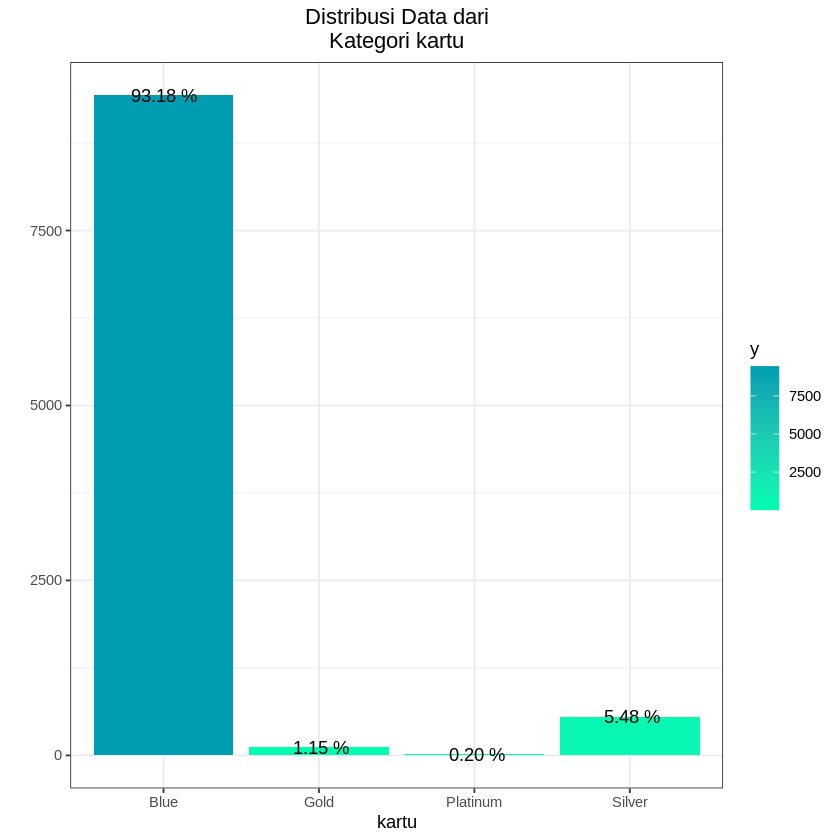

In [ ]:
card_df<-ddply(data, .(data$Card_Category),nrow)
names(card_df)<-c("kartu","freq")
card_df<-card_df %>%
         mutate(percentage = format(round(freq*100/sum(freq),2),nsmall = 2))
card_dist<-ggplot(data = card_df, aes(x = kartu, y = freq, fill = ..y..))+
           geom_bar(stat = "identity", position = "identity") +
           geom_text(aes(label = paste(percentage,"%")),position = position_dodge(width = 1),color = "black")+
           scale_fill_gradient(low = "#00fdb2", high = "#009db2")+
           labs(title  = "Distribusi Data dari\nKategori kartu", y = "")+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
card_dist

Mayoritas pelanggan bank menggunakan kartu yang berwarna biru

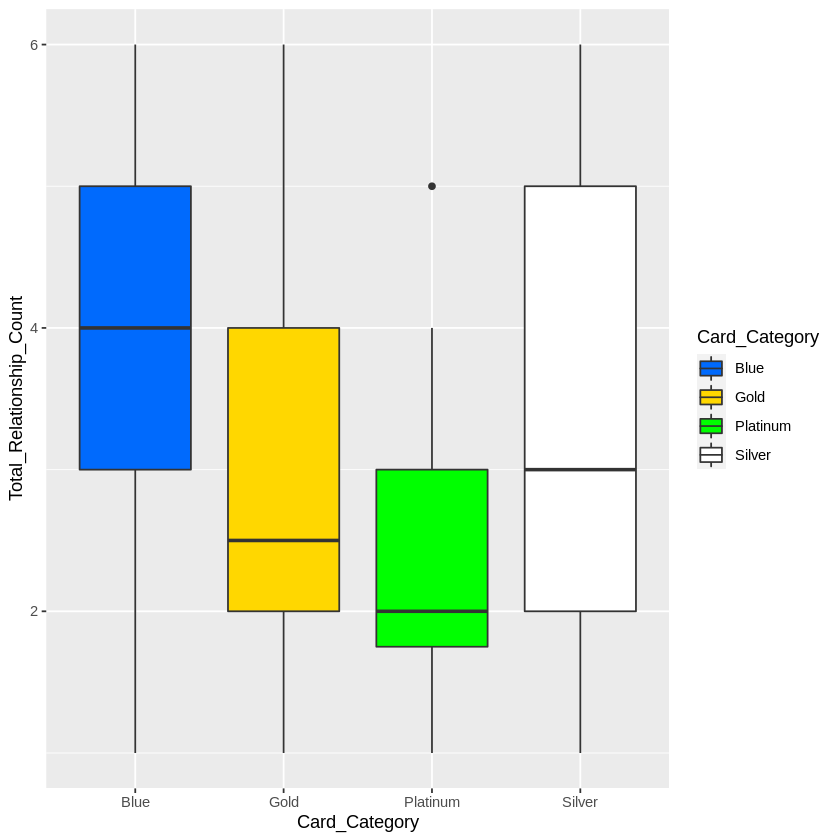

In [ ]:
box_2<-ggplot(data = data, aes(x = Card_Category, y = Total_Relationship_Count, fill = Card_Category))+
      geom_boxplot() +scale_fill_manual(values = c("#006afd","gold","green", "white"))
box_2

dari grafik di atas dapat disimpulkan bahwa

untuk kategori gold, platinum, dan silver datanya mengelompok di bagian bawah boxplot

sedangkan untuk kategori blue datanya cenderung terdistribusi secara merata

# Umur dan Jenis kelamin

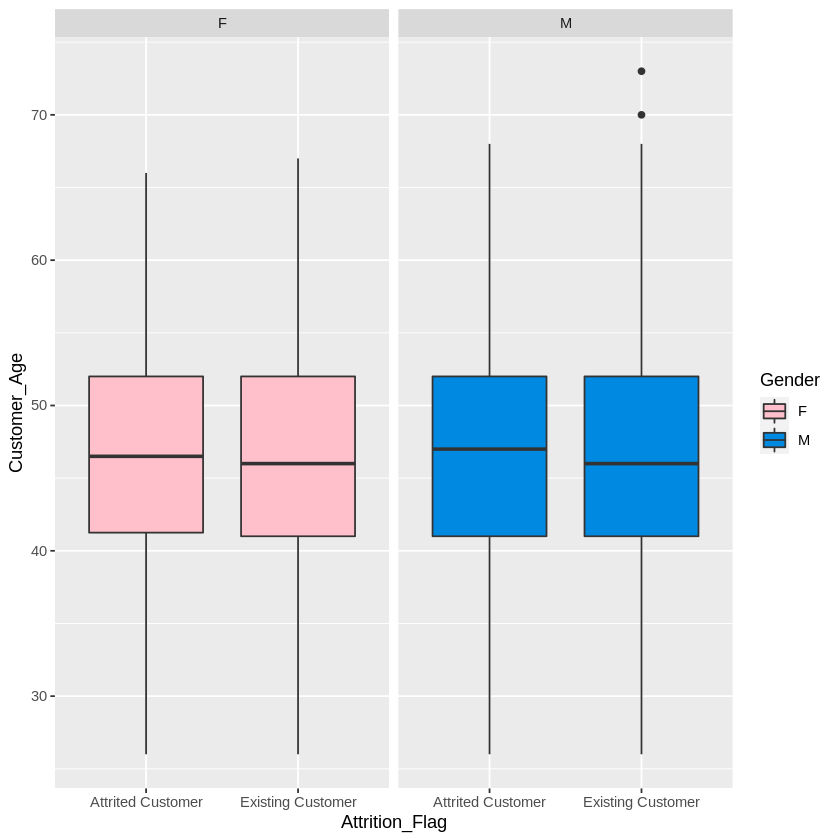

In [ ]:
box_1<-ggplot(data = data, aes(x = Attrition_Flag, y = Customer_Age, fill = Gender))+
       geom_boxplot() + facet_wrap(~Gender) +scale_fill_manual(values = c("pink", "#0089e0"))
box_1

Baik dari laki-laki maupun perempuan yang masih berlangganan dengan yang tidak berlangganan jumlahnya tidak jauh berbeda

dari laki-laki yang masih berlangganan memiliki dua pencilan pada boxplot

# Credit Limit

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



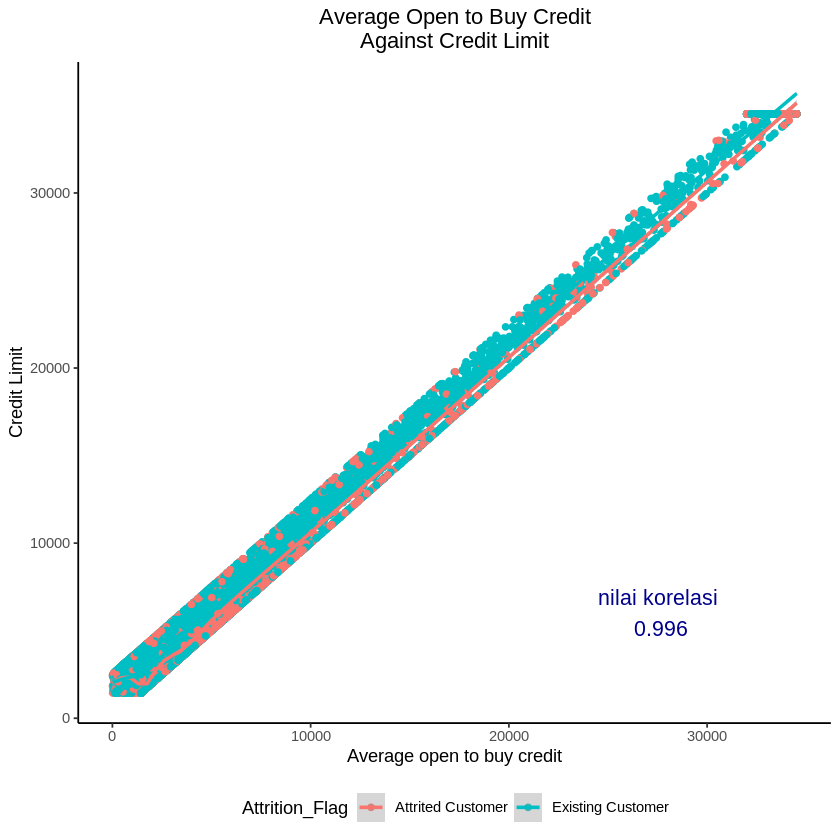

In [ ]:
Bal_util <- data %>% ggplot(aes(x=Avg_Open_To_Buy,y = Credit_Limit,color=Attrition_Flag)) +
  geom_point() +
  geom_smooth() +
  labs(x='Average open to buy credit',y='Credit Limit',
       title='Average Open to Buy Credit\nAgainst Credit Limit') +
  theme_classic() +
  theme(plot.title=element_text(hjust=0.5),legend.position = 'bottom')+
  annotate(geom = "text", y = 6000 ,x = 27500, color = "darkblue", size = 4.5,
           label = paste("nilai korelasi\n",round(cor(data$Avg_Open_To_Buy,data$Credit_Limit),3)))
Bal_util

1.   Korelasi antara credit limit dan Average Open to buy sangat tinggi
2.   Tidak terlihat ada korelasi antara credit limit dan average open to buy terhadap atrisi pelanggan

